##  The XGBoost forecasting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from datetime import datetime
import os

### Load & Clean Data 

In [2]:
data_path = '../data/AAPL.csv'  # adjust as needed
df = pd.read_csv(data_path, header=1)
df = df[df['Ticker'] != 'Date'].copy()
df['Ticker'] = pd.to_datetime(df['Ticker'])
df.set_index('Ticker', inplace=True)
df = df.asfreq('B')
df['Close'] = pd.to_numeric(df['AAPL.3'], errors='coerce')
df['Close'].interpolate(method='linear', inplace=True)

C:\Users\GODIWOUR\AppData\Local\Temp\ipykernel_26832\1608586892.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Close'].interpolate(method='linear', inplace=True)


### 2. Feature Engineering

In [3]:
df['DayOfWeek'] = df.index.dayofweek
df['Month'] = df.index.month
df['Lag1'] = df['Close'].shift(1)
df['Lag2'] = df['Close'].shift(2)
df['Lag3'] = df['Close'].shift(3)
df.dropna(inplace=True)

features = ['Lag1', 'Lag2', 'Lag3', 'DayOfWeek', 'Month']
target = 'Close'

### 3. Train-Test Split

In [5]:
split_index = len(df) - 30
X_train, X_test = df[features].iloc[:split_index], df[features].iloc[split_index:]
y_train, y_test = df[target].iloc[:split_index], df[target].iloc[split_index:]

### 4. Scaling

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 5. Model Training

In [7]:
model = XGBRegressor(objective='reg:squarederror', n_estimators=100)
model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

### 6. Forecasting 

In [8]:
forecast = model.predict(X_test_scaled)

### 7. Evaluation

In [9]:
mae = mean_absolute_error(y_test, forecast)
mse = mean_squared_error(y_test, forecast)
rmse = np.sqrt(mse)

print("\n📊 Evaluation for XGBoost")
print("------------------------------")
print(f"MAE : {mae:.4f}")
print(f"MSE : {mse:.4f}")
print(f"RMSE: {rmse:.4f}")


📊 Evaluation for XGBoost
------------------------------
MAE : 2.9778
MSE : 17.1253
RMSE: 4.1383


### 8. Visualize Performance

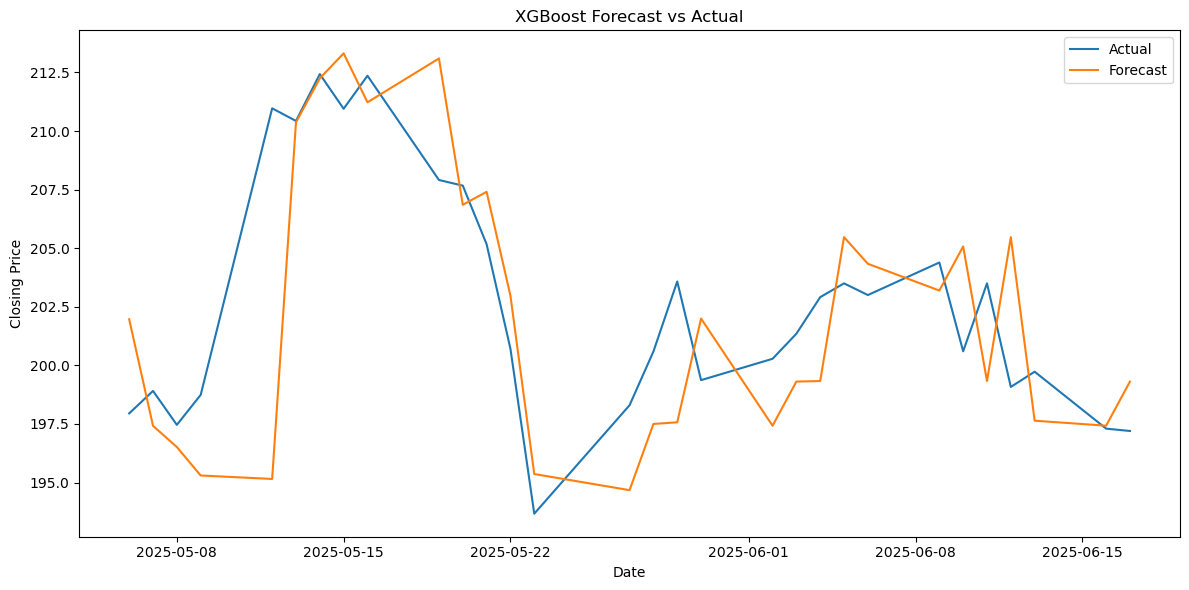

In [10]:
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, forecast, label='Forecast')
plt.title('XGBoost Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.tight_layout()
plt.show()